In [1]:
import os
os.chdir(os.path.abspath('..'))

import torch
from scripts import model_loader
from model import pipeline

from PIL import Image
from transformers import CLIPTokenizer

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/vocab.json", merges_file="data/merges.txt")
model_file = "saved_checkpoints/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

for model_name, model in models.items():
    print(f"{model_name} model loaded: {type(model)}")

h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


encoder model loaded: <class 'model.encoder.VAE_Encoder'>
decoder model loaded: <class 'model.decoder.VAE_Decoder'>
diffusion model loaded: <class 'model.diffusion.Diffusion'>
clip model loaded: <class 'model.clip.CLIP'>


# Text-to-Image Architecture

CLIP encoding shape: torch.Size([2, 77, 768])
CLIP encoding stats: mean=-0.1081, std=1.0277
Initial latents shape: torch.Size([1, 4, 64, 64])
Initial latents mean: 0.0031, std: 0.9969


  0%|          | 0/50 [00:00<?, ?it/s]

Step 0, timestep: 980


  2%|▏         | 1/50 [00:14<12:10, 14.90s/it]

UNet input stats: mean=0.0031, std=0.9969
UNet output stats: mean=-0.0065, std=0.9989
Updated latents stats: mean=0.0050, std=0.9967
Step 1, timestep: 960


  4%|▍         | 2/50 [00:20<07:39,  9.57s/it]

UNet input stats: mean=0.0050, std=0.9967
UNet output stats: mean=-0.0053, std=0.9980
Updated latents stats: mean=0.0095, std=0.9936
Step 2, timestep: 940


  6%|▌         | 3/50 [00:26<06:08,  7.84s/it]

UNet input stats: mean=0.0095, std=0.9936
UNet output stats: mean=-0.0022, std=0.9950
Updated latents stats: mean=0.0075, std=0.9972
Step 3, timestep: 920


  8%|▊         | 4/50 [00:32<05:26,  7.09s/it]

UNet input stats: mean=0.0075, std=0.9972
UNet output stats: mean=-0.0054, std=0.9997
Updated latents stats: mean=0.0061, std=0.9948
Step 4, timestep: 900


 10%|█         | 5/50 [00:38<04:58,  6.64s/it]

UNet input stats: mean=0.0061, std=0.9948
UNet output stats: mean=-0.0020, std=0.9978
Updated latents stats: mean=0.0103, std=0.9949
Step 5, timestep: 880


 12%|█▏        | 6/50 [00:44<04:46,  6.52s/it]

UNet input stats: mean=0.0103, std=0.9948
UNet output stats: mean=0.0013, std=0.9963
Updated latents stats: mean=0.0095, std=0.9947
Step 6, timestep: 860


 14%|█▍        | 7/50 [00:50<04:33,  6.37s/it]

UNet input stats: mean=0.0095, std=0.9947
UNet output stats: mean=-0.0004, std=0.9977
Updated latents stats: mean=0.0118, std=0.9915
Step 7, timestep: 840


 16%|█▌        | 8/50 [00:56<04:22,  6.25s/it]

UNet input stats: mean=0.0118, std=0.9914
UNet output stats: mean=0.0006, std=0.9988
Updated latents stats: mean=0.0082, std=0.9929
Step 8, timestep: 820


 18%|█▊        | 9/50 [01:02<04:16,  6.26s/it]

UNet input stats: mean=0.0082, std=0.9929
UNet output stats: mean=-0.0078, std=1.0001
Updated latents stats: mean=0.0112, std=0.9880
Step 9, timestep: 800


 20%|██        | 10/50 [01:09<04:11,  6.29s/it]

UNet input stats: mean=0.0112, std=0.9880
UNet output stats: mean=-0.0022, std=0.9988
Updated latents stats: mean=0.0123, std=0.9859
Step 10, timestep: 780


 22%|██▏       | 11/50 [01:15<04:08,  6.38s/it]

UNet input stats: mean=0.0123, std=0.9858
UNet output stats: mean=-0.0027, std=0.9940
Updated latents stats: mean=0.0153, std=0.9849
Step 11, timestep: 760


 24%|██▍       | 12/50 [01:22<04:00,  6.34s/it]

UNet input stats: mean=0.0153, std=0.9849
UNet output stats: mean=-0.0013, std=0.9879
Updated latents stats: mean=0.0137, std=0.9784
Step 12, timestep: 740


 26%|██▌       | 13/50 [01:28<03:53,  6.31s/it]

UNet input stats: mean=0.0137, std=0.9784
UNet output stats: mean=-0.0012, std=0.9816
Updated latents stats: mean=0.0193, std=0.9754
Step 13, timestep: 720


 28%|██▊       | 14/50 [01:34<03:46,  6.28s/it]

UNet input stats: mean=0.0193, std=0.9754
UNet output stats: mean=-0.0000, std=0.9812
Updated latents stats: mean=0.0193, std=0.9759
Step 14, timestep: 700


 30%|███       | 15/50 [01:41<03:41,  6.34s/it]

UNet input stats: mean=0.0193, std=0.9759
UNet output stats: mean=0.0006, std=0.9851
Updated latents stats: mean=0.0189, std=0.9722
Step 15, timestep: 680


 32%|███▏      | 16/50 [01:47<03:37,  6.39s/it]

UNet input stats: mean=0.0189, std=0.9722
UNet output stats: mean=0.0011, std=0.9806
Updated latents stats: mean=0.0175, std=0.9698
Step 16, timestep: 660


 34%|███▍      | 17/50 [01:53<03:29,  6.35s/it]

UNet input stats: mean=0.0175, std=0.9698
UNet output stats: mean=0.0008, std=0.9829
Updated latents stats: mean=0.0151, std=0.9719
Step 17, timestep: 640


 36%|███▌      | 18/50 [02:00<03:21,  6.31s/it]

UNet input stats: mean=0.0151, std=0.9719
UNet output stats: mean=-0.0009, std=0.9910
Updated latents stats: mean=0.0188, std=0.9704
Step 18, timestep: 620


 38%|███▊      | 19/50 [02:06<03:16,  6.32s/it]

UNet input stats: mean=0.0188, std=0.9704
UNet output stats: mean=-0.0034, std=0.9825
Updated latents stats: mean=0.0216, std=0.9668
Step 19, timestep: 600


 40%|████      | 20/50 [02:13<03:15,  6.51s/it]

UNet input stats: mean=0.0216, std=0.9667
UNet output stats: mean=-0.0032, std=0.9827
Updated latents stats: mean=0.0253, std=0.9636
Step 20, timestep: 580


 42%|████▏     | 21/50 [02:19<03:07,  6.45s/it]

UNet input stats: mean=0.0253, std=0.9636
UNet output stats: mean=-0.0025, std=0.9816
Updated latents stats: mean=0.0308, std=0.9595
Step 21, timestep: 560


 44%|████▍     | 22/50 [02:26<03:01,  6.49s/it]

UNet input stats: mean=0.0308, std=0.9594
UNet output stats: mean=-0.0010, std=0.9830
Updated latents stats: mean=0.0323, std=0.9604
Step 22, timestep: 540


 46%|████▌     | 23/50 [02:32<02:54,  6.48s/it]

UNet input stats: mean=0.0323, std=0.9604
UNet output stats: mean=-0.0009, std=0.9803
Updated latents stats: mean=0.0374, std=0.9571
Step 23, timestep: 520


 48%|████▊     | 24/50 [02:39<02:47,  6.45s/it]

UNet input stats: mean=0.0374, std=0.9571
UNet output stats: mean=0.0004, std=0.9828
Updated latents stats: mean=0.0402, std=0.9490
Step 24, timestep: 500


 50%|█████     | 25/50 [02:45<02:42,  6.49s/it]

UNet input stats: mean=0.0402, std=0.9490
UNet output stats: mean=0.0006, std=0.9722
Updated latents stats: mean=0.0411, std=0.9437
Step 25, timestep: 480


 52%|█████▏    | 26/50 [02:52<02:35,  6.49s/it]

UNet input stats: mean=0.0411, std=0.9437
UNet output stats: mean=-0.0003, std=0.9705
Updated latents stats: mean=0.0405, std=0.9398
Step 26, timestep: 460


 54%|█████▍    | 27/50 [02:58<02:29,  6.50s/it]

UNet input stats: mean=0.0405, std=0.9398
UNet output stats: mean=-0.0003, std=0.9682
Updated latents stats: mean=0.0422, std=0.9408
Step 27, timestep: 440


 56%|█████▌    | 28/50 [03:04<02:21,  6.41s/it]

UNet input stats: mean=0.0422, std=0.9408
UNet output stats: mean=-0.0002, std=0.9631
Updated latents stats: mean=0.0427, std=0.9348
Step 28, timestep: 420


 58%|█████▊    | 29/50 [03:11<02:13,  6.36s/it]

UNet input stats: mean=0.0427, std=0.9348
UNet output stats: mean=0.0001, std=0.9585
Updated latents stats: mean=0.0469, std=0.9346
Step 29, timestep: 400


 60%|██████    | 30/50 [03:17<02:07,  6.38s/it]

UNet input stats: mean=0.0469, std=0.9345
UNet output stats: mean=-0.0000, std=0.9533
Updated latents stats: mean=0.0477, std=0.9284
Step 30, timestep: 380


 62%|██████▏   | 31/50 [03:23<02:00,  6.32s/it]

UNet input stats: mean=0.0477, std=0.9284
UNet output stats: mean=0.0002, std=0.9460
Updated latents stats: mean=0.0495, std=0.9237
Step 31, timestep: 360


 64%|██████▍   | 32/50 [03:29<01:53,  6.31s/it]

UNet input stats: mean=0.0495, std=0.9237
UNet output stats: mean=-0.0001, std=0.9392
Updated latents stats: mean=0.0505, std=0.9201
Step 32, timestep: 340


 66%|██████▌   | 33/50 [03:36<01:47,  6.30s/it]

UNet input stats: mean=0.0505, std=0.9201
UNet output stats: mean=-0.0001, std=0.9356
Updated latents stats: mean=0.0501, std=0.9160
Step 33, timestep: 320


 68%|██████▊   | 34/50 [03:43<01:44,  6.51s/it]

UNet input stats: mean=0.0501, std=0.9160
UNet output stats: mean=0.0001, std=0.9335
Updated latents stats: mean=0.0545, std=0.9100
Step 34, timestep: 300


 70%|███████   | 35/50 [03:50<01:38,  6.60s/it]

UNet input stats: mean=0.0545, std=0.9099
UNet output stats: mean=0.0002, std=0.9299
Updated latents stats: mean=0.0587, std=0.9024
Step 35, timestep: 280


 72%|███████▏  | 36/50 [03:56<01:32,  6.63s/it]

UNet input stats: mean=0.0587, std=0.9024
UNet output stats: mean=0.0001, std=0.9177
Updated latents stats: mean=0.0604, std=0.8957
Step 36, timestep: 260


 74%|███████▍  | 37/50 [04:03<01:27,  6.72s/it]

UNet input stats: mean=0.0604, std=0.8957
UNet output stats: mean=0.0001, std=0.9071
Updated latents stats: mean=0.0629, std=0.8876
Step 37, timestep: 240


 76%|███████▌  | 38/50 [04:10<01:21,  6.77s/it]

UNet input stats: mean=0.0629, std=0.8876
UNet output stats: mean=0.0002, std=0.8954
Updated latents stats: mean=0.0621, std=0.8800
Step 38, timestep: 220


 78%|███████▊  | 39/50 [04:17<01:14,  6.74s/it]

UNet input stats: mean=0.0621, std=0.8800
UNet output stats: mean=-0.0000, std=0.8855
Updated latents stats: mean=0.0625, std=0.8731
Step 39, timestep: 200


 80%|████████  | 40/50 [04:23<01:06,  6.65s/it]

UNet input stats: mean=0.0625, std=0.8730
UNet output stats: mean=-0.0000, std=0.8742
Updated latents stats: mean=0.0633, std=0.8681
Step 40, timestep: 180


 82%|████████▏ | 41/50 [04:30<00:59,  6.60s/it]

UNet input stats: mean=0.0633, std=0.8681
UNet output stats: mean=0.0001, std=0.8623
Updated latents stats: mean=0.0644, std=0.8628
Step 41, timestep: 160


 84%|████████▍ | 42/50 [04:36<00:52,  6.55s/it]

UNet input stats: mean=0.0644, std=0.8628
UNet output stats: mean=0.0001, std=0.8491
Updated latents stats: mean=0.0670, std=0.8594
Step 42, timestep: 140


 86%|████████▌ | 43/50 [04:43<00:46,  6.64s/it]

UNet input stats: mean=0.0670, std=0.8594
UNet output stats: mean=-0.0000, std=0.8361
Updated latents stats: mean=0.0700, std=0.8534
Step 43, timestep: 120


 88%|████████▊ | 44/50 [04:49<00:39,  6.58s/it]

UNet input stats: mean=0.0700, std=0.8533
UNet output stats: mean=-0.0001, std=0.8162
Updated latents stats: mean=0.0719, std=0.8475
Step 44, timestep: 100


 90%|█████████ | 45/50 [04:56<00:32,  6.53s/it]

UNet input stats: mean=0.0719, std=0.8475
UNet output stats: mean=-0.0004, std=0.7990
Updated latents stats: mean=0.0740, std=0.8413
Step 45, timestep: 80


 92%|█████████▏| 46/50 [05:03<00:26,  6.59s/it]

UNet input stats: mean=0.0740, std=0.8413
UNet output stats: mean=-0.0001, std=0.7726
Updated latents stats: mean=0.0762, std=0.8362
Step 46, timestep: 60


 94%|█████████▍| 47/50 [05:10<00:20,  6.70s/it]

UNet input stats: mean=0.0762, std=0.8362
UNet output stats: mean=-0.0001, std=0.7461
Updated latents stats: mean=0.0771, std=0.8322
Step 47, timestep: 40


 96%|█████████▌| 48/50 [05:16<00:13,  6.69s/it]

UNet input stats: mean=0.0771, std=0.8322
UNet output stats: mean=-0.0001, std=0.6967
Updated latents stats: mean=0.0788, std=0.8258
Step 48, timestep: 20


 98%|█████████▊| 49/50 [05:22<00:06,  6.56s/it]

UNet input stats: mean=0.0788, std=0.8258
UNet output stats: mean=-0.0002, std=0.6193
Updated latents stats: mean=0.0799, std=0.8168
Step 49, timestep: 0


100%|██████████| 50/50 [05:29<00:00,  6.59s/it]

UNet input stats: mean=0.0799, std=0.8168
UNet output stats: mean=-0.0007, std=0.2482
Updated latents stats: mean=0.0800, std=0.8164


Final latents stats: mean=0.0800, std=0.8164
Decoded image stats: min=0.0000, max=255.0000, mean=94.2523


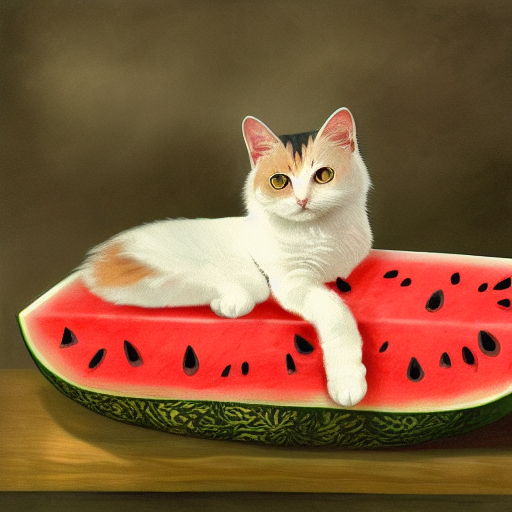

In [2]:
prompt = "calico cat, loafing, large watermelon bed, cartoon"
uncond_prompt = "" # You can use it as a negative prompt

do_cfg = True
cfg_scale = 7
sampler = "ddpm"
strength = 0.6

num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)

# Image-to-Image Architecture

CLIP encoding shape: torch.Size([2, 77, 768])
CLIP encoding stats: mean=-0.1064, std=1.0346
Strength set to 0.6. Starting at step 36 out of 90
Using 54 timesteps for inference
Initial latents shape: torch.Size([1, 4, 64, 64])
Initial latents mean: -0.0230, std: 0.9136


  0%|          | 0/54 [00:00<?, ?it/s]

Step 0, timestep: 583


  2%|▏         | 1/54 [00:06<05:31,  6.25s/it]

UNet input stats: mean=-0.0230, std=0.9135
UNet output stats: mean=0.0016, std=1.0056
Updated latents stats: mean=-0.0222, std=0.9088
Step 1, timestep: 572


  4%|▎         | 2/54 [00:11<05:06,  5.89s/it]

UNet input stats: mean=-0.0222, std=0.9088
UNet output stats: mean=0.0029, std=0.9908
Updated latents stats: mean=-0.0206, std=0.9042
Step 2, timestep: 561


  6%|▌         | 3/54 [00:17<04:48,  5.66s/it]

UNet input stats: mean=-0.0206, std=0.9041
UNet output stats: mean=-0.0020, std=0.9636
Updated latents stats: mean=-0.0231, std=0.9006
Step 3, timestep: 550


  7%|▋         | 4/54 [00:22<04:44,  5.68s/it]

UNet input stats: mean=-0.0231, std=0.9006
UNet output stats: mean=-0.0003, std=0.9675
Updated latents stats: mean=-0.0246, std=0.8965
Step 4, timestep: 539


  9%|▉         | 5/54 [00:28<04:42,  5.77s/it]

UNet input stats: mean=-0.0246, std=0.8965
UNet output stats: mean=-0.0019, std=0.9842
Updated latents stats: mean=-0.0265, std=0.8915
Step 5, timestep: 528


 11%|█         | 6/54 [00:34<04:34,  5.73s/it]

UNet input stats: mean=-0.0265, std=0.8914
UNet output stats: mean=0.0004, std=0.9678
Updated latents stats: mean=-0.0258, std=0.8893
Step 6, timestep: 517


 13%|█▎        | 7/54 [00:39<04:22,  5.59s/it]

UNet input stats: mean=-0.0258, std=0.8893
UNet output stats: mean=-0.0011, std=0.9585
Updated latents stats: mean=-0.0284, std=0.8870
Step 7, timestep: 506


 15%|█▍        | 8/54 [00:45<04:14,  5.53s/it]

UNet input stats: mean=-0.0284, std=0.8870
UNet output stats: mean=-0.0006, std=0.9694
Updated latents stats: mean=-0.0298, std=0.8802
Step 8, timestep: 495


 17%|█▋        | 9/54 [00:51<04:17,  5.72s/it]

UNet input stats: mean=-0.0298, std=0.8802
UNet output stats: mean=-0.0004, std=0.9755
Updated latents stats: mean=-0.0341, std=0.8769
Step 9, timestep: 484


 19%|█▊        | 10/54 [00:57<04:21,  5.94s/it]

UNet input stats: mean=-0.0341, std=0.8769
UNet output stats: mean=-0.0005, std=0.9715
Updated latents stats: mean=-0.0351, std=0.8696
Step 10, timestep: 473


 20%|██        | 11/54 [01:03<04:16,  5.97s/it]

UNet input stats: mean=-0.0351, std=0.8696
UNet output stats: mean=0.0001, std=0.9603
Updated latents stats: mean=-0.0352, std=0.8653
Step 11, timestep: 462


 22%|██▏       | 12/54 [01:10<04:15,  6.07s/it]

UNet input stats: mean=-0.0352, std=0.8653
UNet output stats: mean=0.0010, std=0.9530
Updated latents stats: mean=-0.0358, std=0.8602
Step 12, timestep: 451


 24%|██▍       | 13/54 [01:16<04:12,  6.17s/it]

UNet input stats: mean=-0.0358, std=0.8602
UNet output stats: mean=0.0007, std=0.9522
Updated latents stats: mean=-0.0375, std=0.8566
Step 13, timestep: 440


 26%|██▌       | 14/54 [01:22<04:08,  6.21s/it]

UNet input stats: mean=-0.0375, std=0.8565
UNet output stats: mean=0.0002, std=0.9482
Updated latents stats: mean=-0.0407, std=0.8514
Step 14, timestep: 429


 28%|██▊       | 15/54 [01:29<04:01,  6.20s/it]

UNet input stats: mean=-0.0407, std=0.8514
UNet output stats: mean=0.0008, std=0.9533
Updated latents stats: mean=-0.0400, std=0.8443
Step 15, timestep: 418


 30%|██▉       | 16/54 [01:35<03:57,  6.25s/it]

UNet input stats: mean=-0.0400, std=0.8443
UNet output stats: mean=0.0011, std=0.9418
Updated latents stats: mean=-0.0409, std=0.8391
Step 16, timestep: 407


 31%|███▏      | 17/54 [01:41<03:53,  6.30s/it]

UNet input stats: mean=-0.0409, std=0.8391
UNet output stats: mean=0.0005, std=0.9552
Updated latents stats: mean=-0.0438, std=0.8345
Step 17, timestep: 396


 33%|███▎      | 18/54 [01:47<03:44,  6.22s/it]

UNet input stats: mean=-0.0438, std=0.8345
UNet output stats: mean=0.0002, std=0.9473
Updated latents stats: mean=-0.0427, std=0.8284
Step 18, timestep: 385


 35%|███▌      | 19/54 [01:54<03:38,  6.25s/it]

UNet input stats: mean=-0.0427, std=0.8284
UNet output stats: mean=-0.0003, std=0.9440
Updated latents stats: mean=-0.0425, std=0.8210
Step 19, timestep: 374


 37%|███▋      | 20/54 [02:00<03:31,  6.23s/it]

UNet input stats: mean=-0.0425, std=0.8210
UNet output stats: mean=0.0001, std=0.9441
Updated latents stats: mean=-0.0445, std=0.8135
Step 20, timestep: 363


 39%|███▉      | 21/54 [02:06<03:20,  6.08s/it]

UNet input stats: mean=-0.0445, std=0.8134
UNet output stats: mean=0.0001, std=0.9418
Updated latents stats: mean=-0.0457, std=0.8084
Step 21, timestep: 352


 41%|████      | 22/54 [02:12<03:16,  6.15s/it]

UNet input stats: mean=-0.0457, std=0.8084
UNet output stats: mean=0.0001, std=0.9418
Updated latents stats: mean=-0.0463, std=0.8027
Step 22, timestep: 341


 43%|████▎     | 23/54 [02:18<03:12,  6.21s/it]

UNet input stats: mean=-0.0463, std=0.8027
UNet output stats: mean=-0.0001, std=0.9356
Updated latents stats: mean=-0.0480, std=0.7982
Step 23, timestep: 330


 44%|████▍     | 24/54 [02:24<03:05,  6.20s/it]

UNet input stats: mean=-0.0480, std=0.7982
UNet output stats: mean=-0.0001, std=0.9304
Updated latents stats: mean=-0.0471, std=0.7904
Step 24, timestep: 319


 46%|████▋     | 25/54 [02:31<02:59,  6.20s/it]

UNet input stats: mean=-0.0471, std=0.7904
UNet output stats: mean=-0.0002, std=0.9272
Updated latents stats: mean=-0.0478, std=0.7829
Step 25, timestep: 308


 48%|████▊     | 26/54 [02:37<02:54,  6.23s/it]

UNet input stats: mean=-0.0478, std=0.7829
UNet output stats: mean=-0.0003, std=0.9245
Updated latents stats: mean=-0.0477, std=0.7748
Step 26, timestep: 297


 50%|█████     | 27/54 [02:43<02:46,  6.15s/it]

UNet input stats: mean=-0.0477, std=0.7748
UNet output stats: mean=-0.0000, std=0.9208
Updated latents stats: mean=-0.0487, std=0.7673
Step 27, timestep: 286


 52%|█████▏    | 28/54 [02:49<02:40,  6.18s/it]

UNet input stats: mean=-0.0487, std=0.7673
UNet output stats: mean=0.0002, std=0.9158
Updated latents stats: mean=-0.0488, std=0.7600
Step 28, timestep: 275


 54%|█████▎    | 29/54 [02:56<02:37,  6.29s/it]

UNet input stats: mean=-0.0488, std=0.7600
UNet output stats: mean=0.0002, std=0.9131
Updated latents stats: mean=-0.0505, std=0.7550
Step 29, timestep: 264


 56%|█████▌    | 30/54 [03:02<02:31,  6.32s/it]

UNet input stats: mean=-0.0505, std=0.7549
UNet output stats: mean=0.0002, std=0.9077
Updated latents stats: mean=-0.0506, std=0.7465
Step 30, timestep: 253


 57%|█████▋    | 31/54 [03:08<02:24,  6.26s/it]

UNet input stats: mean=-0.0506, std=0.7465
UNet output stats: mean=0.0004, std=0.9043
Updated latents stats: mean=-0.0505, std=0.7401
Step 31, timestep: 242


 59%|█████▉    | 32/54 [03:15<02:19,  6.34s/it]

UNet input stats: mean=-0.0505, std=0.7401
UNet output stats: mean=0.0004, std=0.9025
Updated latents stats: mean=-0.0518, std=0.7342
Step 32, timestep: 231


 61%|██████    | 33/54 [03:21<02:13,  6.35s/it]

UNet input stats: mean=-0.0518, std=0.7342
UNet output stats: mean=0.0003, std=0.9022
Updated latents stats: mean=-0.0545, std=0.7248
Step 33, timestep: 220


 63%|██████▎   | 34/54 [03:27<02:07,  6.36s/it]

UNet input stats: mean=-0.0545, std=0.7248
UNet output stats: mean=0.0007, std=0.8968
Updated latents stats: mean=-0.0535, std=0.7177
Step 34, timestep: 209


 65%|██████▍   | 35/54 [03:34<02:00,  6.34s/it]

UNet input stats: mean=-0.0535, std=0.7177
UNet output stats: mean=0.0006, std=0.8949
Updated latents stats: mean=-0.0534, std=0.7107
Step 35, timestep: 198


 67%|██████▋   | 36/54 [03:40<01:54,  6.35s/it]

UNet input stats: mean=-0.0534, std=0.7107
UNet output stats: mean=0.0006, std=0.8909
Updated latents stats: mean=-0.0542, std=0.7015
Step 36, timestep: 187


 69%|██████▊   | 37/54 [03:46<01:45,  6.21s/it]

UNet input stats: mean=-0.0542, std=0.7015
UNet output stats: mean=0.0005, std=0.8890
Updated latents stats: mean=-0.0549, std=0.6932
Step 37, timestep: 176


 70%|███████   | 38/54 [03:54<01:46,  6.66s/it]

UNet input stats: mean=-0.0549, std=0.6932
UNet output stats: mean=0.0004, std=0.8833
Updated latents stats: mean=-0.0570, std=0.6857
Step 38, timestep: 165


 72%|███████▏  | 39/54 [04:01<01:44,  6.95s/it]

UNet input stats: mean=-0.0570, std=0.6857
UNet output stats: mean=0.0007, std=0.8774
Updated latents stats: mean=-0.0584, std=0.6775
Step 39, timestep: 154


 74%|███████▍  | 40/54 [04:08<01:37,  6.95s/it]

UNet input stats: mean=-0.0584, std=0.6775
UNet output stats: mean=0.0007, std=0.8681
Updated latents stats: mean=-0.0599, std=0.6699
Step 40, timestep: 143


 76%|███████▌  | 41/54 [04:17<01:35,  7.33s/it]

UNet input stats: mean=-0.0599, std=0.6699
UNet output stats: mean=0.0008, std=0.8622
Updated latents stats: mean=-0.0611, std=0.6638
Step 41, timestep: 132


 78%|███████▊  | 42/54 [04:25<01:31,  7.62s/it]

UNet input stats: mean=-0.0611, std=0.6638
UNet output stats: mean=0.0010, std=0.8548
Updated latents stats: mean=-0.0622, std=0.6562
Step 42, timestep: 121


 80%|███████▉  | 43/54 [04:32<01:23,  7.62s/it]

UNet input stats: mean=-0.0622, std=0.6562
UNet output stats: mean=0.0009, std=0.8445
Updated latents stats: mean=-0.0628, std=0.6500
Step 43, timestep: 110


 81%|████████▏ | 44/54 [04:39<01:12,  7.22s/it]

UNet input stats: mean=-0.0628, std=0.6500
UNet output stats: mean=0.0009, std=0.8358
Updated latents stats: mean=-0.0646, std=0.6436
Step 44, timestep: 99


 83%|████████▎ | 45/54 [04:44<01:00,  6.70s/it]

UNet input stats: mean=-0.0646, std=0.6436
UNet output stats: mean=0.0009, std=0.8292
Updated latents stats: mean=-0.0674, std=0.6364
Step 45, timestep: 88


 85%|████████▌ | 46/54 [04:50<00:51,  6.45s/it]

UNet input stats: mean=-0.0674, std=0.6364
UNet output stats: mean=0.0008, std=0.8192
Updated latents stats: mean=-0.0688, std=0.6302
Step 46, timestep: 77


 87%|████████▋ | 47/54 [04:56<00:44,  6.30s/it]

UNet input stats: mean=-0.0688, std=0.6302
UNet output stats: mean=0.0008, std=0.8075
Updated latents stats: mean=-0.0713, std=0.6251
Step 47, timestep: 66


 89%|████████▉ | 48/54 [05:02<00:36,  6.13s/it]

UNet input stats: mean=-0.0713, std=0.6251
UNet output stats: mean=0.0008, std=0.7910
Updated latents stats: mean=-0.0710, std=0.6191
Step 48, timestep: 55


 91%|█████████ | 49/54 [05:07<00:29,  5.95s/it]

UNet input stats: mean=-0.0710, std=0.6191
UNet output stats: mean=0.0010, std=0.7753
Updated latents stats: mean=-0.0695, std=0.6121
Step 49, timestep: 44


 93%|█████████▎| 50/54 [05:13<00:23,  5.83s/it]

UNet input stats: mean=-0.0695, std=0.6121
UNet output stats: mean=0.0010, std=0.7496
Updated latents stats: mean=-0.0701, std=0.6065
Step 50, timestep: 33


 94%|█████████▍| 51/54 [05:18<00:17,  5.75s/it]

UNet input stats: mean=-0.0701, std=0.6065
UNet output stats: mean=0.0009, std=0.7199
Updated latents stats: mean=-0.0701, std=0.5993
Step 51, timestep: 22


 96%|█████████▋| 52/54 [05:24<00:11,  5.71s/it]

UNet input stats: mean=-0.0701, std=0.5993
UNet output stats: mean=0.0009, std=0.6783
Updated latents stats: mean=-0.0708, std=0.5921
Step 52, timestep: 11


 98%|█████████▊| 53/54 [05:29<00:05,  5.59s/it]

UNet input stats: mean=-0.0708, std=0.5921
UNet output stats: mean=0.0006, std=0.5993
Updated latents stats: mean=-0.0711, std=0.5819
Step 53, timestep: 0


100%|██████████| 54/54 [05:35<00:00,  6.21s/it]

UNet input stats: mean=-0.0711, std=0.5819
UNet output stats: mean=-0.0009, std=0.2801
Updated latents stats: mean=-0.0711, std=0.5808


Final latents stats: mean=-0.0711, std=0.5808
Decoded image stats: min=0.0000, max=254.0000, mean=117.2600


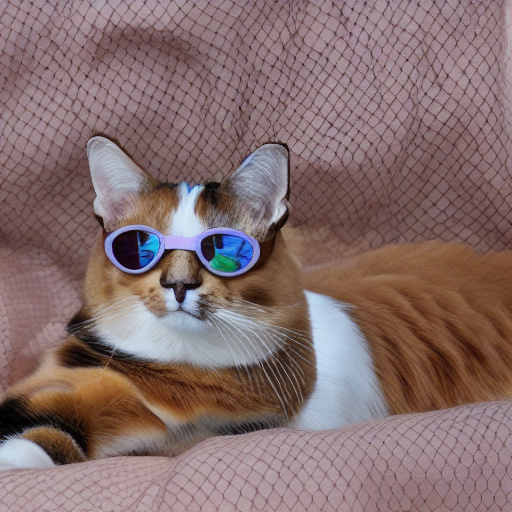

In [17]:
prompt = "Calico cat wearing sunglasses"
uncond_prompt = "" # You can use it as a negative prompt

do_cfg = True
cfg_scale = 7
sampler = "ddpm"
strength = 0.6
num_inference_steps = 90
seed = 42

image_path = "examples/cat.png"
input_image = Image.open(image_path)

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    #seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)